# Peak finding algorithm experiment
This experiment explores some peak finding algorithm and measure their time performance


In [1]:
%matplotlib inline
import simulate
import find_peak_slope
import find_peak_value
import numpy as np
import matplotlib.pyplot as plt 
import scipy.signal as ss

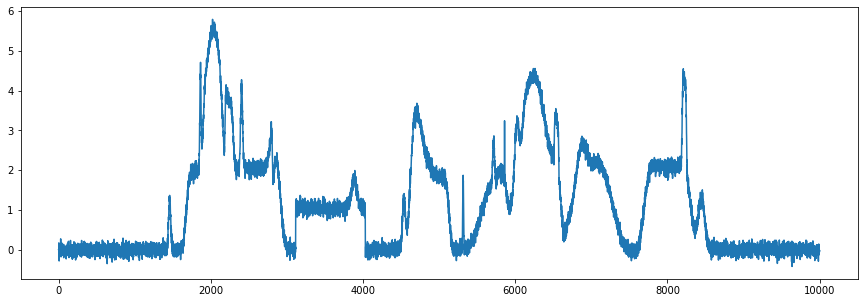

In [2]:
# original data
sp = simulate.random()
plt.figure(figsize=(15,5))
plt.plot(sp)
plt.show()

## Algorithm 1:  Find peak by slope
First smooth input signal, then calculate its slope and find where `slope > slope_th`, finally find rising/falling edge by these slope 

45.7 µs ± 966 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


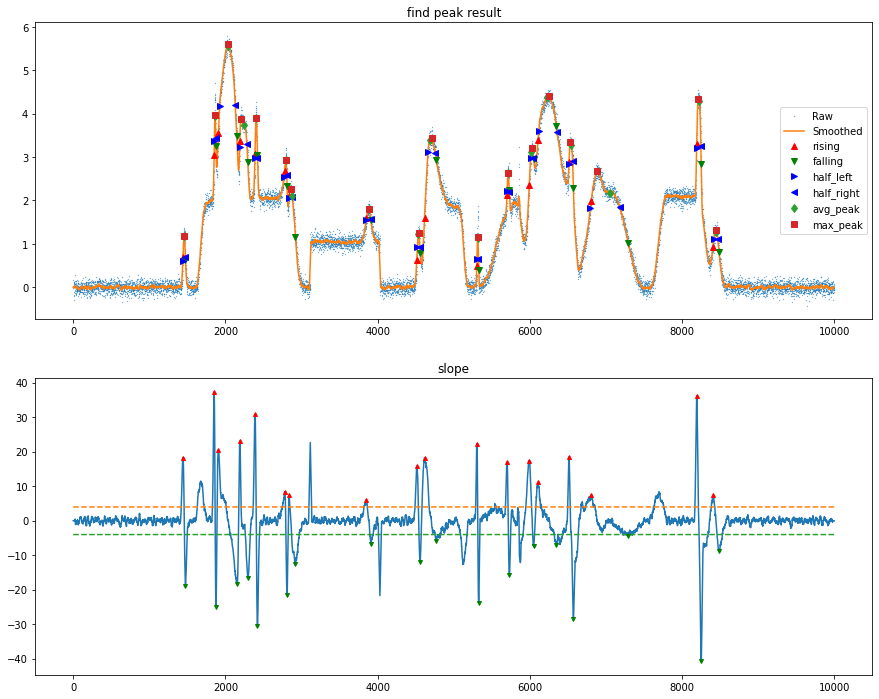

In [3]:
# find peak by slope
def FindPeakBySlope(sp,width,slope_th):
    dsp,sm = find_peak_slope.dev(sp,width) # calculate derivative/slope
    rising_edge,falling_edge = find_peak_slope.FindPeakBySlope(dsp,slope_th,slope_th/3) 
slope_th = 4
sm,dsp,rising_edge,falling_edge,avg_frq,max_frq,dev_band,half_left,half_right,half_band = find_peak_slope.find_peak_slope(sp,21,slope_th)

%timeit FindPeakBySlope(sp,21,slope_th)

find_peak_slope.plot_all(sp,sm,dsp,slope_th,rising_edge,falling_edge,avg_frq,max_frq,dev_band,half_left,half_right,f=1,origin=None)


## Algorithm 2: Find peak by threshold
find a peak at some location <i> on signal <x>, then find nearest left/right point that match `x[i]-x[left]>th, x[i]-x[right]>th`  
The left/right points are boundary of this peak, remove it and find next peak on remain signal

12.5 µs ± 127 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


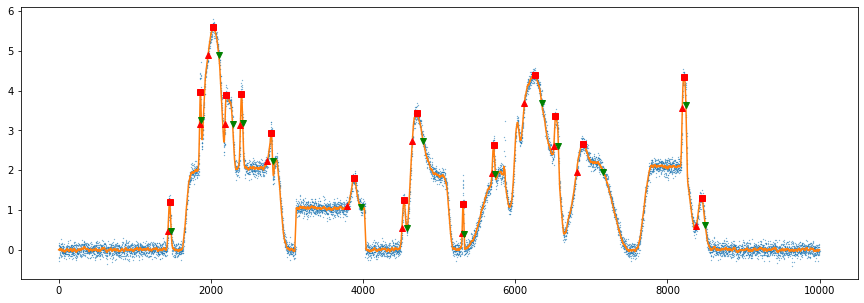

In [8]:
# find peak by band
band_th = 0.7
x = sm
rising_edge,falling_edge,maxloc = find_peak_value.FindBandByValue(x,band_th)

%timeit find_peak_value.FindBandByValue(x,band_th)

plt.figure(figsize=(15,5))
plt.plot(sp,'.',markersize=0.5,label='Raw')
plt.plot(x)
plt.plot(rising_edge,x[rising_edge],'r^')
plt.plot(falling_edge,x[falling_edge],'gv')
plt.plot(maxloc,x[maxloc],'rs')
plt.show()

In [10]:
sm.tofile('test.dat')
print("peak find result: \n",np.array([rising_edge,maxloc,falling_edge]).T,'\n')

# this is pure C implementation of algorithm 2
from subprocess import Popen,PIPE
p = Popen("find_peak_by_value.exe", stdout=PIPE,shell=True)
(output, err) = p.communicate()
p_status = p.wait()
print("Pure C implenmentation result: \n",output.decode('utf8'))
avg_c_time = np.array([0.000020, 0.000026, 0.000018, 0.000018, 0.000023, 0.000019, 0.000019]).mean()*1e6
print(f"Average elaspe time in pure C: {avg_c_time :.4f} us")

peak find result: 
 [[1437 1458 1479]
 [1852 1864 1875]
 [1963 2032 2104]
 [2186 2205 2286]
 [2389 2403 2418]
 [2741 2794 2811]
 [3790 3882 3971]
 [4512 4538 4574]
 [4648 4709 4792]
 [5302 5316 5328]
 [5694 5715 5738]
 [6122 6256 6348]
 [6508 6528 6567]
 [6806 6886 7155]
 [8196 8215 8243]
 [8379 8451 8498]] 

Pure C implenmentation result: 
 0.000018, 0.000019, 0.000018, 0.000018, 0.000018, 0.000018, 0.000018, 
rising/max/falling: 1437, 1458, 1479
rising/max/falling: 1852, 1864, 1875
rising/max/falling: 1963, 2032, 2104
rising/max/falling: 2186, 2205, 2286
rising/max/falling: 2389, 2403, 2418
rising/max/falling: 2741, 2794, 2811
rising/max/falling: 3790, 3882, 3971
rising/max/falling: 4512, 4538, 4574
rising/max/falling: 4648, 4709, 4792
rising/max/falling: 5302, 5316, 5328
rising/max/falling: 5694, 5715, 5738
rising/max/falling: 6122, 6256, 6348
rising/max/falling: 6508, 6528, 6567
rising/max/falling: 6806, 6886, 7155
rising/max/falling: 8196, 8215, 8243
rising/max/falling: 8379, 8451

## Algorithm 3: Find peak by prominence  
find peak that its `prominence>thp`, The [prominence](https://www.mathworks.com/help/signal/ug/prominence.html) of a peak measures how much the peak stands out due to its intrinsic height and its location relative to other peaks.

812 µs ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


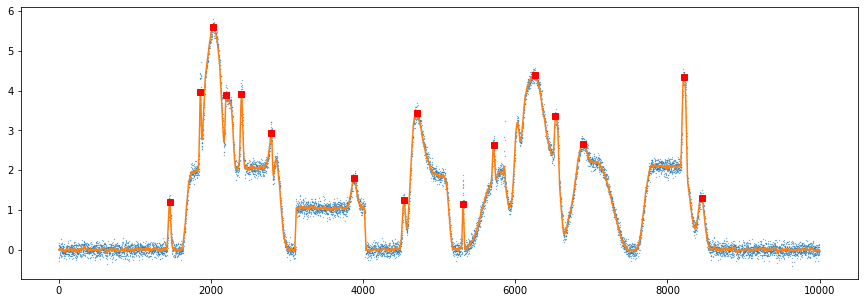

In [11]:
ploc,args = ss.find_peaks(x,prominence=0.7)
%timeit ss.find_peaks(x,prominence=0.7)
plt.figure(figsize=(15,5))
plt.plot(sp,'.',markersize=0.5,label='Raw')
plt.plot(x)
plt.plot(ploc,x[ploc],'rs')
plt.show()